In [1]:
%matplotlib inline
%autoreload 2 

In [2]:
from __future__ import (division, absolute_import,
                        print_function, unicode_literals)

In [3]:
import george
import pandas as pd
from george.kernels import (ExpSquaredKernel, 
                            WhiteKernel, 
                            KappaKappaExpSquaredKernel)

In [4]:
import matplotlib.pyplot as plt

In [5]:
import sys
sys.path.append("../")
import sample_and_fit_gp as fit
import diag_plots as dplot

In [6]:
from numpy.linalg import cond

# visualize likelihood surface

In [7]:
kernels = [ExpSquaredKernel, WhiteKernel]

In [8]:
derKernels = [KappaKappaExpSquaredKernel, WhiteKernel]

# plot in George's parametrization

-[] irregular spacing of data points  
-[] log10 transform  
-[] log transform  
-[] original scaling  
-[] WhiteKernel as nugget term   
-[] small i.i.d. gaussian random noise added in quadrature to diagonal of covariance matrix   
-[] test optimization ?

  

# parametrization ...

$$K = \lambda^{-1} \exp\left(\frac{-r^2}{2l^2}\right) + \sigma_n^2 I$$

\begin{align}
- \ln L(a, b) = - 1/ 2 \ln (y^T K^{-1} y) - 1 / 2. \ln |det(K)| - n / 2. \ln (2\pi)
\end{align}

In [114]:
inv_lambda = 1.
l_sq = 1.
noise_amp = 1e-2
p0_rng = (0.01, 100.)
p0_grid_pts = 40
p1_rng = (1e-6, 100.)
p1_grid_pts = 40

rng = (0, 10.)
data_pts_no_per_side = 10

p0_grid, p1_grid, likelihood_surface = \
    fit.compute_log10_transformed_ln_likelihood_surface(
    inv_lambda, l_sq, noise_amp, kernels, 
    data_pts_no_per_side, p0_rng=p0_rng,
    p1_rng=p1_rng, p0_grid_pts=p0_grid_pts, 
    p1_grid_pts=p1_grid_pts)


noise_amp = 1.00e-02
Generating 2D data ...
Kernel matrix is positive definite.
Cond # = 8.30e+05
Computing likelihood surface ...


Plotting likelihood surface ...


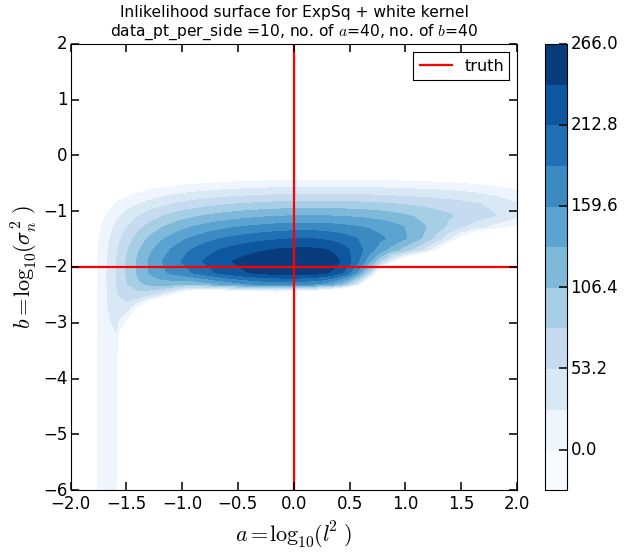

In [119]:
_ = dplot.plot_log10_transformed_ln_likelihood_surface(
    (l_sq, noise_amp), p0_grid, p1_grid, likelihood_surface,
    "ExpSq + white kernel", data_pts_no_per_side, r"$a = \log_{10}(l^2)$", 
    r"$b = \log_{10}(\sigma_n^2)$",
)

# visualize data

In [29]:
inv_lambda = 1.
l_sq = .3
noise_amp = 1e-2
data_pts_no_per_side = 15

Kernel matrix is positive definite.
Cond # = 1.47e+06


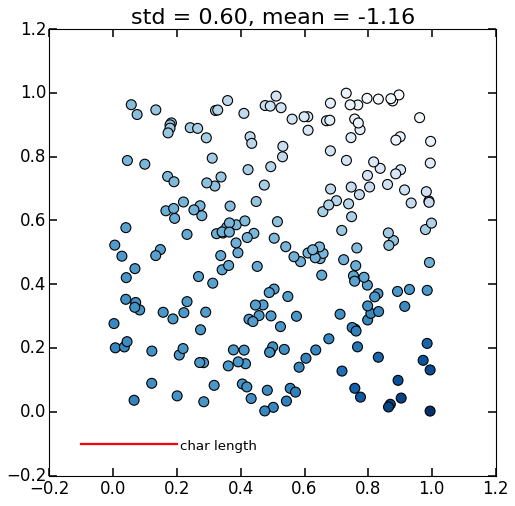

In [30]:
coords, psi = \
    fit.generate_2D_data((inv_lambda, l_sq), data_pts_no_per_side, 
                         kernels, noise_amp=noise_amp, regular_grid=False)
plt.axes().set_aspect("equal")
plt.scatter(coords[:, 0], coords[:, 1], c=psi, s=80)
plt.title("data realization")
plt.plot((-0.1, -0.1 + l_sq,), (-0.1, -0.1), color='r', lw=2)
plt.text(l_sq * .7, -0.12, "char length")
plt.title("std = {0:.2f}, mean = {1:.2f}".format(np.std(psi), np.mean(psi)))

In [21]:
# dplot.plot_2D_gp_sample_contour(psi, coords, 8, [inv_lambda, l_sq])

In [121]:
inv_lambda = 1.
l_sq = .3
noise_amp = 1e-2
data_pts_no_per_side = 5

In [122]:
gp = george.GP(inv_lambda * ExpSquaredKernel(l_sq, ndim=2.) + 
               WhiteKernel(noise_amp ** 2., ndim=2.), mean=0) 

In [123]:
gp.compute(coords, 0)
gp.lnlikelihood(psi)

644.23088762657483

In [124]:
p0_grid, p1_grid, likelihood_surface = \
    fit.compute_ln_likelihood_surface(
    inv_lambda, l_sq, noise_amp, kernels,
    data_pts_no_per_side, p0_rng=(0.01, 1.0), 
    p1_rng=(1e-3, 1.))

noise_amp = 1.00e-02
Generating 2D data ...
Kernel matrix is positive definite.
Cond # = 1.34e+05
Computing likelihood surface ...


Plotting likelihood surface ...


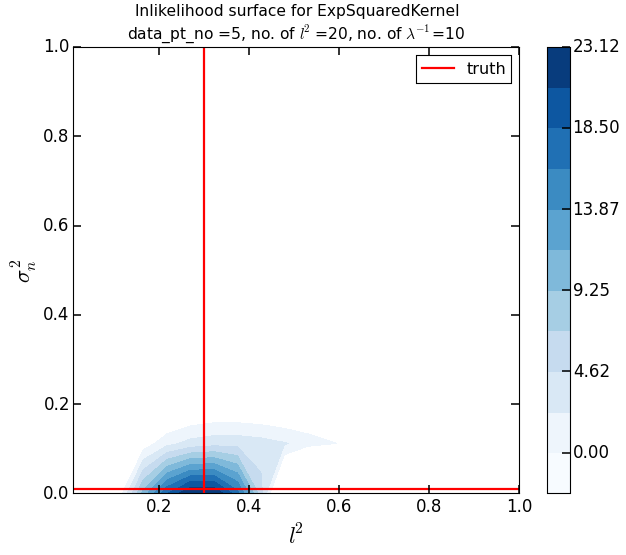

In [125]:
dplot.plot_ln_likelihood_surface(
        p0_grid, p1_grid, likelihood_surface,
        l_sq, noise_amp, kernels[0].__name__,
        p0_label="$l^2$", p1_label="$\sigma_n^2$",
        data_pts_no_per_side=data_pts_no_per_side)